In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format= "{:.2f}".format
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from Cust_Func import *

In [2]:
us_debt_by_day = pd.read_csv("DebtPenny_10_years.csv",index_col='Record Date',parse_dates=True)
us_debt_by_day = us_debt_by_day.drop(['Source Line Number','Fiscal Year','Fiscal Quarter Number',
                                      'Calendar Year','Calendar Quarter Number','Calendar Month Number',
                                      'Calendar Day Number'],axis='columns')
us_debt_by_day = us_debt_by_day.round()

In [3]:
us_debt_by_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2512 entries, 2021-05-28 to 2011-05-31
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Debt Held by the Public        2512 non-null   float64
 1   Intragovernmental Holdings     2512 non-null   float64
 2   Total Public Debt Outstanding  2512 non-null   float64
dtypes: float64(3)
memory usage: 78.5 KB


In [4]:
us_debt_by_day

,Debt Held by the Public,Intragovernmental Holdings,Total Public Debt Outstanding
Record Date,,,
2021-05-28,22020939013606.00,6178069324915.00,28199008338521.00
2021-05-27,21983687097488.00,6179954441120.00,28163641538608.00
2021-05-26,22005892292175.00,6181836272971.00,28187728565146.00
2021-05-25,22005337838702.00,6199345340521.00,28204683179223.00
2021-05-24,22024524562637.00,6189118887688.00,28213643450325.00
...,...,...,...
2011-06-06,9738557389966.00,4606100865261.00,14344658255227.00
2011-06-03,9741263236752.00,4603431155466.00,14344694392217.00
2011-06-02,9735616790662.00,4609089646380.00,14344706437042.00


In [5]:
sorted_us_debt = us_debt_by_day.sort_index()
sorted_us_debt['Debt Held by the Public'] = sorted_us_debt['Debt Held by the Public']/1000000000000
sorted_us_debt['Intragovernmental Holdings'] = sorted_us_debt['Intragovernmental Holdings']/1000000000000
sorted_us_debt['Total Public Debt Outstanding'] = sorted_us_debt['Total Public Debt Outstanding']/1000000000000

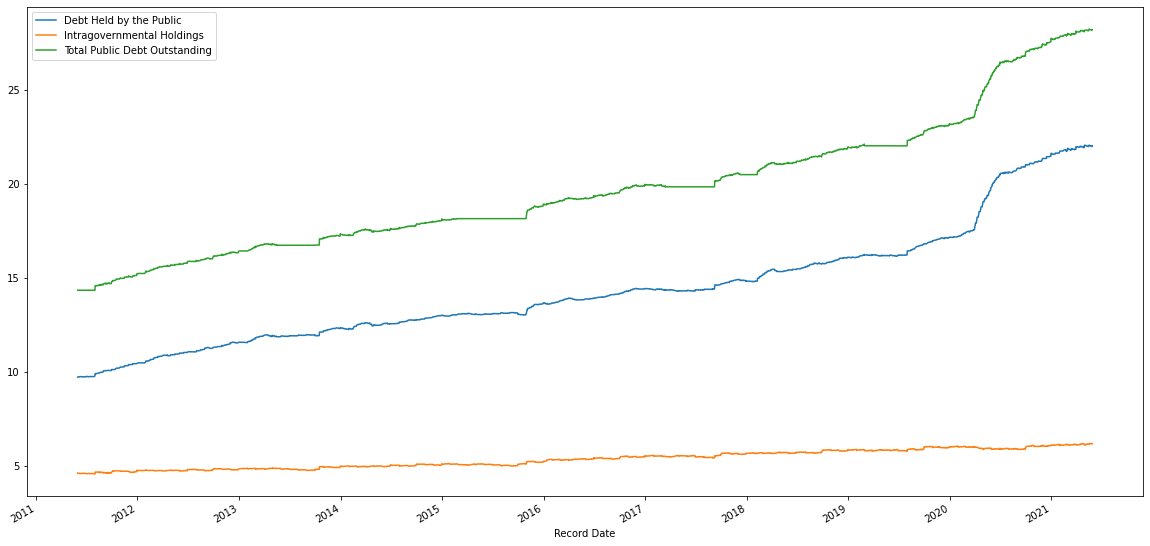

In [6]:
sorted_us_debt.plot(figsize=(20,10));

In [7]:
title = "Total Outstanding US National Debt"
ylabel = "Trillions of Dollars"
xlabel = "Year"

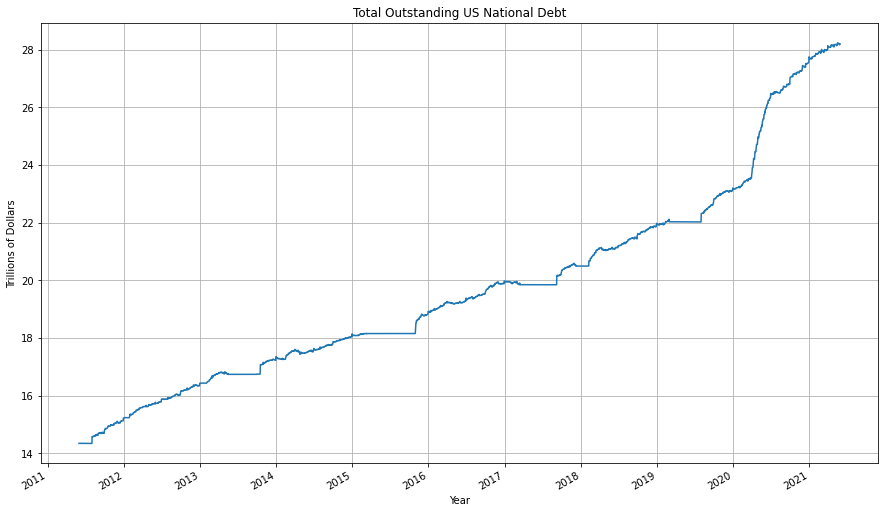

In [8]:
ax = sorted_us_debt['Total Public Debt Outstanding'].plot(figsize=(15,9),title=title);
ax.autoscale()
ax.grid()
ax.set(xlabel=xlabel,ylabel=ylabel);

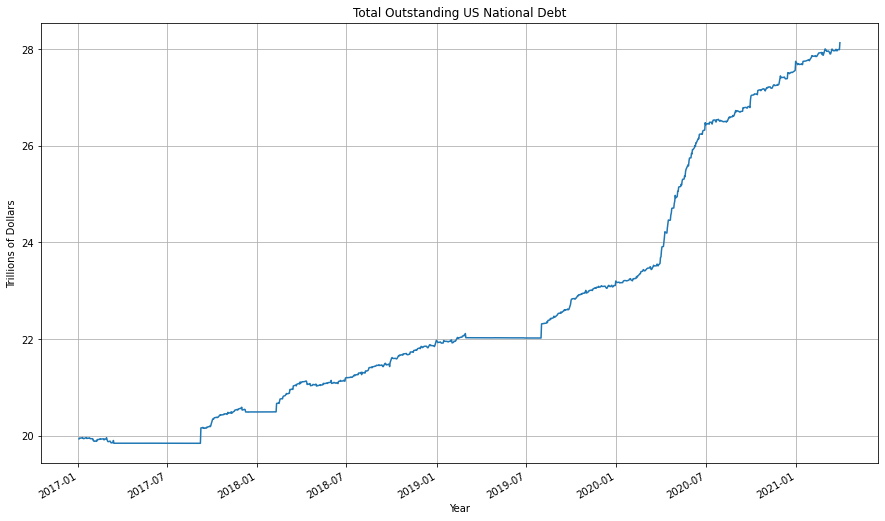

In [9]:
ax = sorted_us_debt['Total Public Debt Outstanding']['2017-01-01':'2021-3-31'].plot(figsize=(15,9),title=title);
ax.autoscale()
ax.grid()
ax.set(xlabel=xlabel,ylabel=ylabel);

C:\Users\josep\AppData\Roaming\Python\Python38\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
C:\Users\josep\AppData\Roaming\Python\Python38\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


ARIMA order is:  (0, 2, 2)
Seasonal ARIMA order is:  (0, 0, 0, 0)
Use ARIMA object stepwise_fit to store ARIMA and seasonal ARIMA orders in variables.


C:\Users\josep\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\josep\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\josep\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\josep\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: Val

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     Total Public Debt Outstanding   No. Observations:                  210
Model:                          SARIMAX(0, 2, 2)   Log Likelihood                 386.048
Date:                           Sat, 05 Jun 2021   AIC                           -766.096
Time:                                   10:25:08   BIC                           -756.127
Sample:                                        0   HQIC                          -762.064
                                           - 210                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1838      0.062    -18.955      0.000      -1.306      -1.061
ma.L2          0.2378      0.065      3.661      0.000       0.110       0.365
sigma2         0.0013   7.42e-05     18.143      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               445.79
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             2.03
Prob(H) (two-sided):                  0.23   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

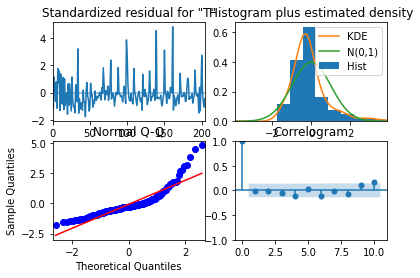

In [14]:
stepwise_fit, stepwise_full, results, results_full = arima_tune(sorted_us_debt, 'Total Public Debt Outstanding', 
                                                                days_to_forecast=60, 
                                                                verbose=True) 

C:\Users\josep\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


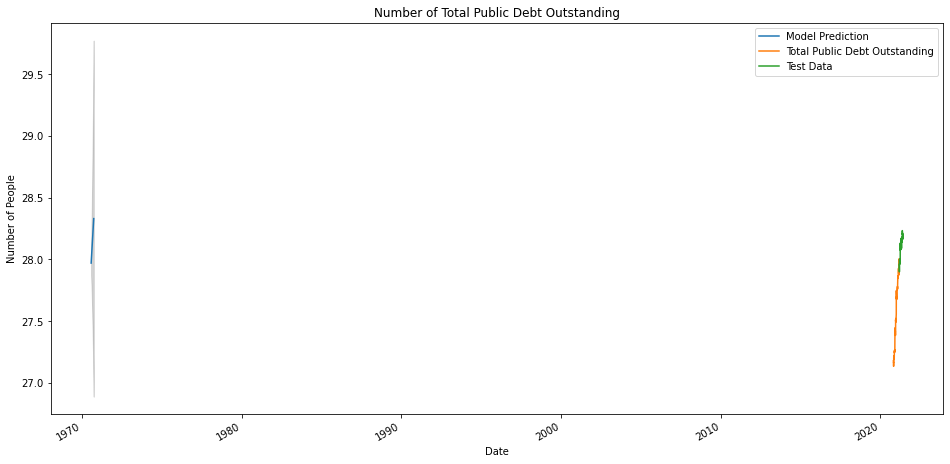

In [15]:
evaluate_predictions(results, sorted_us_debt, 'Total Public Debt Outstanding', stepwise_fit=stepwise_fit, 
                     alpha=.05, days_to_forecast=60)

C:\Users\josep\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


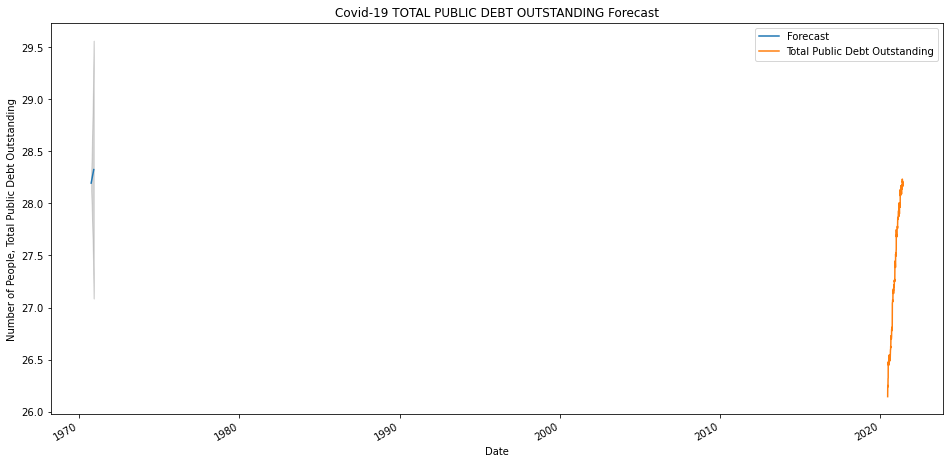

In [16]:
exog_forecast, forecast_obj = build_SARIMAX_forecast(model=results_full, 
                                                     dataframe=sorted_us_debt, 
                                                     target_column='Total Public Debt Outstanding', 
                                                     days_to_forecast=60, 
                                                     stepwise_fit=stepwise_full, 
                                                     alpha=.05)

In [3]:
dfpd.read_csv("USFR_BalSheet_10_years.csv")

,Record Date,Account Description,Line Item Description,Position Amount (in Billions),Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2020-09-30,Assets,Cash and other monetary assets,1926.9,1,2020,4,2020,3,9,30
1,2020-09-30,Assets,"Accounts receivable, net",321.2,2,2020,4,2020,3,9,30
2,2020-09-30,Assets,"Direct loans and loan guarantees receivable, net",1577.4,3,2020,4,2020,3,9,30
3,2020-09-30,Assets,"Inventories and related property, net",379.7,4,2020,4,2020,3,9,30
4,2020-09-30,Assets,"General property, plant and equipment, net",1145.0,5,2020,4,2020,3,9,30
...,...,...,...,...,...,...,...,...,...,...,...
250,2010-09-30,Liabilities,Total liabilities,16356.6,21,2010,4,2010,3,9,30
251,2010-09-30,Net position,Earmarked funds,646.9,22,2010,4,2010,3,9,30
252,2010-09-30,Net position,Non-earmarked funds,-14119.7,23,2010,4,2010,3,9,30
253,2010-09-30,Net position,Total net position,-13472.8,24,2010,4,2010,3,9,30


In [4]:
df.info()

NameError: name 'df' is not defined